In [9]:
import pandas as pd
import pickle
import utils_centrality as utils

In [10]:
with open('graph_objects/G_simple_directed.pickle', 'rb') as f:
    G_simple_directed = pickle.load(f)
    G_simple_directed.name = 'G_simple_directed'

---

# N-k CENTRALITY

### Node removal

In [11]:
"""
Random node removal 
"""
# random_node_removal_df, _ = utils.n_minus_k(G_simple_directed, heuristic='random', remove='node')
# random_node_removal_df.to_pickle('results/centrality/random_node_removal.pkl')
random_node_removal_df = pd.read_pickle('results/centrality/random_node_removal.pkl')

In [12]:
"""
Greedy node removal (i.e. remove the node by CCI_v score)
"""
# greedy_node_removal_df, _ = utils.n_minus_k(G_simple_directed, heuristic='greedy', remove='node')
# greedy_node_removal_df.to_pickle('results/centrality/greedy_node_removal.pkl')
greedy_node_removal_df = pd.read_pickle('results/centrality/greedy_node_removal.pkl')
utils.results_summary(greedy_node_removal_df, metric='composite')

Heuristic: entity criticality index

First entity removals:
----------------------------------------------
 it removed_entity  diff  pct_change
  1      INET_N_82  0.21       -21.0
  2     INET_N_103  0.11       -13.9
  3    INET_N_1630  0.05        -7.4
  4    INET_N_1219  0.08       -12.8
  5    INET_N_1545  0.06       -11.0

Entity removals causing most damage, measured by: composite
----------------------------------------------
 it removed_entity  diff  pct_change
  1      INET_N_82  0.21       -21.0
  2     INET_N_103  0.11       -13.9
  6     INET_N_741  0.09       -18.6
  4    INET_N_1219  0.08       -12.8
  5    INET_N_1545  0.06       -11.0


Summary statistics (first 150 removals)
----------------------------------------------
Percentage network damage: 100.0%
Mean damage per entity removal: 0.11
Variation in damage per entity removal: 0.06
The metric reaches 0 at iteration 235.


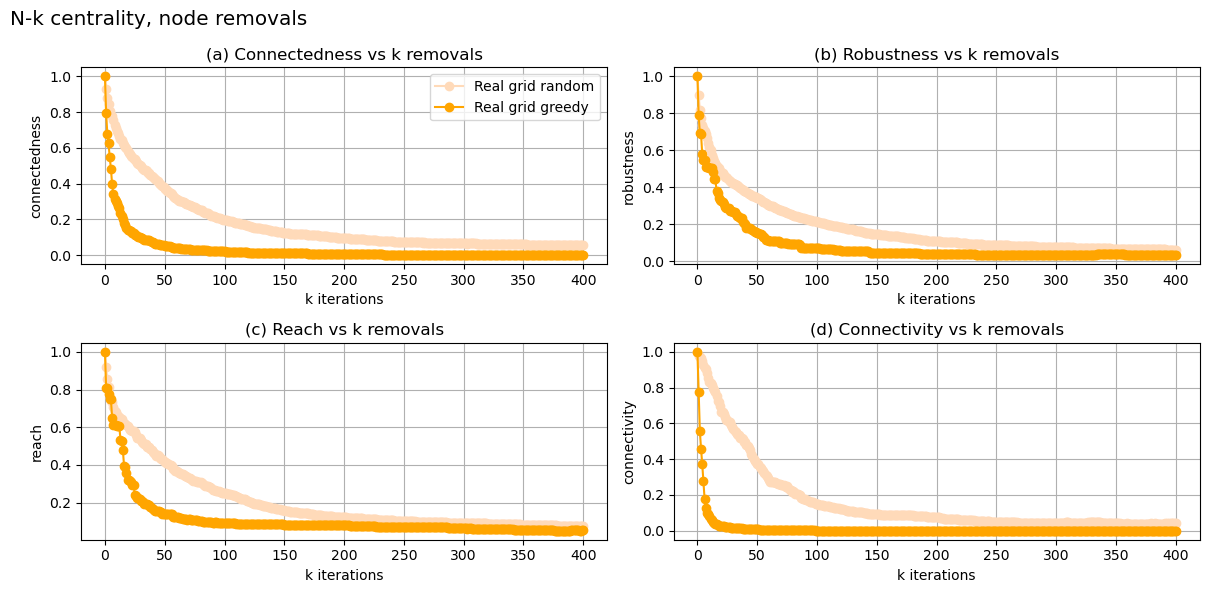

In [13]:
titles = ['(a) Connectedness vs k removals', '(b) Robustness vs k removals', '(c) Reach vs k removals', '(d) Connectivity vs k removals']
utils.plot_connectedness_fourway([random_node_removal_df, greedy_node_removal_df], titles, 'N-k centrality, node removals')

### Edge removal

In [14]:
"""
Random edge removal  
"""
# random_edge_removal_df, _ = utils.n_minus_k(G_simple_directed, heuristic='random', remove='edge')
# random_edge_removal_df.to_pickle('results/centrality/random_edge_removal.pkl')
random_edge_removal_df = pd.read_pickle('results/centrality/random_edge_removal.pkl')

In [15]:
"""
Greedy edge removal (i.e. remove the edge by CCI_e score)  
"""
# greedy_edge_removal_df, _ = utils.n_minus_k(G_simple_directed, heuristic='greedy', remove='edge')
# greedy_edge_removal_df.to_pickle('results/centrality/greedy_edge_removal.pkl')
greedy_edge_removal_df = pd.read_pickle('results/centrality/greedy_edge_removal.pkl')
utils.results_summary(greedy_edge_removal_df, metric='composite')

Heuristic: entity criticality index

First entity removals:
----------------------------------------------
 it             removed_entity  diff  pct_change
  1 {INET_N_1620, INET_N_1637}  0.11       -11.0
  2  {INET_N_741, INET_N_1199}  0.07        -7.9
  3  {INET_N_870, INET_N_1219}  0.13       -15.8
  4  {INET_N_1559, INET_N_890}  0.07       -10.1
  5           {NO_N_4, NO_N_5}  0.05        -8.0

Entity removals causing most damage, measured by: composite
----------------------------------------------
 it             removed_entity  diff  pct_change
  3  {INET_N_870, INET_N_1219}  0.13       -15.8
  1 {INET_N_1620, INET_N_1637}  0.11       -11.0
  2  {INET_N_741, INET_N_1199}  0.07        -7.9
  4  {INET_N_1559, INET_N_890}  0.07       -10.1
  5           {NO_N_4, NO_N_5}  0.05        -8.0


Summary statistics (first 150 removals)
----------------------------------------------
Percentage network damage: 99.6%
Mean damage per entity removal: 0.09
Variation in damage per entity removal

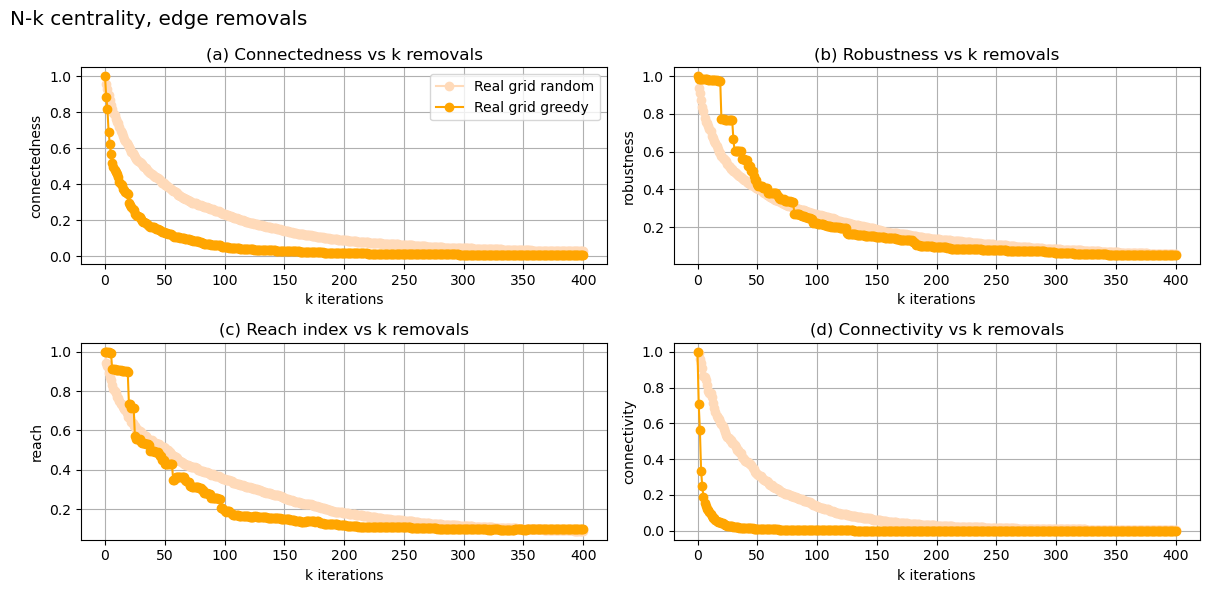

In [16]:
titles = ['(a) Connectedness vs k removals', '(b) Robustness vs k removals', '(c) Reach index vs k removals', '(d) Connectivity vs k removals']
utils.plot_connectedness_fourway([random_edge_removal_df, greedy_edge_removal_df], titles, 'N-k centrality, edge removals')